## Homework 2.1
### Optimization, variant 3
#### Sofiia Petryshyn, APPS UCU

In [161]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import rcParams
from scipy.optimize import linprog
%matplotlib inline
np.random.seed(1729)
plt.rcParams['figure.figsize'] = 15, 8

In [162]:
# Production
goal = np.array([216.18616928, 195.718539, 176.8435644, 156.06823893, 161.2252143,\
 174.82359282, 183.53185311, 189.58580472, 203.11211409, 207.56262067,
 211.95970354, 213.57970776])

# Number of people we need
goal = np.ceil(goal / 2).astype(int)


# CONTRACTS:
# once = 0; every month = 1, num_of_months
# insurance
# month income 
# bonus
avail_contracts = {3: [0, 300, 1000, 0],
                   4: [1, 110, 900, 0],
                   7: [(3, 4), (110, 90), 850, 100],
                   5: [0, 0, 950, 450]}

In [163]:
print("Number of people we need per month: ", goal)

Number of people we need per month:  [109  98  89  79  81  88  92  95 102 104 106 107]


In [164]:
print('Total number of decision variables: ' + str(len(goal)))
print(['x' + str(i) for i in range(0, len(goal))])

Total number of decision variables: 12
['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11']


Create constarins for each type of cointract based on insurance, bonus and month income.

In [165]:
cost = []
for key, cont in avail_contracts.items():
    temp_cost = 0
    if cont[0] == 0:
        temp_cost += cont[1]
    if cont[0] == 1:
        temp_cost += cont[1] * key
    if type(cont[0]) == tuple:
        for i in range(len(cont[0])):
            temp_cost += cont[0][i] * cont[1][i]
    temp_cost += cont[2] * key + cont[3]
    cost.append(temp_cost)

In [166]:
print("For each type of contract we have to spend this amount: ", cost)

For each type of contract we have to spend this amount:  [3300, 4040, 6740, 5200]


In [167]:
# Objective function
months = 12
vec_min = np.array([i for i in cost for _ in range(months)])
vec_min

array([3300, 3300, 3300, 3300, 3300, 3300, 3300, 3300, 3300, 3300, 3300,
       3300, 4040, 4040, 4040, 4040, 4040, 4040, 4040, 4040, 4040, 4040,
       4040, 4040, 6740, 6740, 6740, 6740, 6740, 6740, 6740, 6740, 6740,
       6740, 6740, 6740, 5200, 5200, 5200, 5200, 5200, 5200, 5200, 5200,
       5200, 5200, 5200, 5200])

In [168]:
# Constraint matrix
# rows: h (1 year in our case),
# cols: len(avail_contracts) * h (3 * 1 year)

A_full = np.empty((months, months * len(avail_contracts)), dtype=np.int64)
for n, m in enumerate(avail_contracts):
    A_temp = np.zeros((months, months), dtype=np.int64)
    for i in range(months):
        for j in range(max(0, i-m+1), min(i+1, months)):
            A_temp[i, j] = 1
    A_full[:, months * n: months * (n+1)] = A_temp
A_con = A_full[:months, :]

In [169]:
pd.DataFrame(A_con)

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,1,1,1,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
4,0,0,1,1,1,0,0,0,0,0,...,1,1,1,0,0,0,0,0,0,0
5,0,0,0,1,1,1,0,0,0,0,...,1,1,1,1,0,0,0,0,0,0
6,0,0,0,0,1,1,1,0,0,0,...,1,1,1,1,1,0,0,0,0,0
7,0,0,0,0,0,1,1,1,0,0,...,0,1,1,1,1,1,0,0,0,0
8,0,0,0,0,0,0,1,1,1,0,...,0,0,1,1,1,1,1,0,0,0
9,0,0,0,0,0,0,0,1,1,1,...,0,0,0,1,1,1,1,1,0,0


In [170]:
#### Optimizer
c = vec_min
b = - np.array(goal)
A = - A_con

res = linprog(c, A, b)
print(res)

     con: array([], dtype=float64)
     fun: 1192379.9999895038
 message: 'Optimization terminated successfully.'
     nit: 9
   slack: array([-1.14177112e-09,  1.10000000e+01,  2.00000000e+01, -6.78355150e-10,
       -6.94996061e-10, -6.77516709e-10, -7.85348675e-10, -8.14438295e-10,
       -8.86672069e-10,  2.57598302e+00,  9.02376214e-01, -9.47792955e-10])
  status: 0
 success: True
       x: array([3.00000000e+01, 4.83607294e-12, 8.22915668e-12, 8.05812307e-12,
       3.80328854e-11, 2.15627413e-11, 4.00000000e+00, 8.86469302e-12,
       4.96187970e-12, 8.57598302e+00, 3.26393198e-01, 9.76237853e-02,
       9.58449734e-11, 5.23583536e-12, 7.33426724e-12, 2.04239992e-11,
       2.00000000e+00, 2.25047496e-11, 1.43238958e-11, 6.97602528e-12,
       9.00000000e+00, 1.33143651e-11, 1.43671165e-11, 2.35955268e-11,
       4.18566073e+01, 4.41202550e-12, 1.13778091e-11, 1.11640615e-11,
       7.32761776e-12, 4.41433927e+01, 1.09790736e-10, 8.04200776e-12,
       5.14903595e-12, 4.70540141

In [171]:
opt = np.asmatrix(np.ceil(res.x))
plan = opt.reshape((len(avail_contracts), -1)).transpose()
result = np.asmatrix(A_con) * np.asmatrix(opt).transpose()
print(plan)
print(result)

[[30.  1. 42. 38.]
 [ 1.  1.  1.  1.]
 [ 1.  1.  1.  1.]
 [ 1.  1.  1.  1.]
 [ 1.  3.  1.  1.]
 [ 1.  1. 45.  1.]
 [ 4.  1.  1.  1.]
 [ 1.  1.  1. 45.]
 [ 1.  9.  1.  1.]
 [ 9.  1.  1.  1.]
 [ 1.  1.  1.  1.]
 [ 1.  1.  1.  1.]]
[[111.]
 [115.]
 [119.]
 [ 93.]
 [ 97.]
 [105.]
 [109.]
 [112.]
 [118.]
 [123.]
 [123.]
 [123.]]


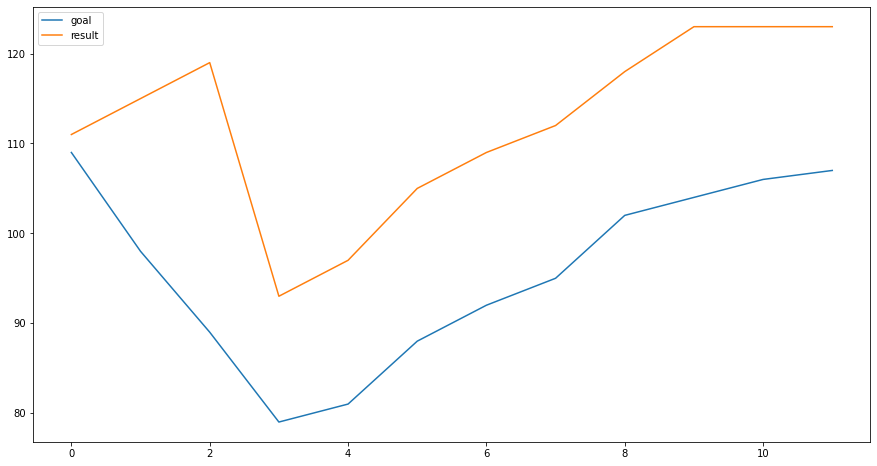

In [172]:
plt.plot(goal, label='goal')
plt.plot(result, label='result')
plt.legend();

In [173]:
result.flatten().tolist()

[[111.0,
  115.0,
  119.0,
  93.0,
  97.0,
  105.0,
  109.0,
  112.0,
  118.0,
  123.0,
  123.0,
  123.0]]

#### Conclusions:
As we had no staff working at the beginning, we had to hire a lot of people in the first month. Next we see that the situation is changing because we hire and fire employes.